##  <H1><FONT COLOR='blue' >&#x1F535;בחירות לכנסת ישראל&#x1F535;</FONT></H1> 
___
1. [אחוז החסימה - ניתוח מפלגות קטנות](#section1)
2. [קולות פסולים - ממצאים והמלצות](#section2)
3. [קמפינים](#section3)
4. [מעמדות פוליטיים](#section4)
5. [אחוז ההצבעה בישובים](#section5)



In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

<div>
<img src="https://raw.githubusercontent.com/Fitness-Squad/votes/main/%D7%AA%D7%9E%D7%95%D7%A0%D7%95%D7%AA/WhatsApp%20Image%202022-05-18%20at%2013.08.07.jpeg"/>
</div>

In [42]:
vote24_df = pd.read_csv('https://raw.githubusercontent.com/Fitness-Squad/votes/main/%D7%AA%D7%95%D7%A6%D7%90%D7%95%D7%AA%20%D7%9C%D7%A4%D7%99%20%D7%99%D7%A9%D7%95%D7%91%D7%99%D7%9D%20%D7%9B%D7%A0%D7%A1%D7%AA%20%D7%94%2024.csv',encoding='iso-8859-8')
vote23_df = pd.read_csv('https://raw.githubusercontent.com/Fitness-Squad/votes/main/votes%20per%20city%2023.csv?token=GHSAT0AAAAAABUEONRRHRYANGP6EZG5HVDGYTP22CQ',encoding='iso-8859-8')
vote22_df = pd.read_csv('https://raw.githubusercontent.com/Fitness-Squad/votes/main/votes%20per%20city%2023.csv?token=GHSAT0AAAAAABUEONRQVONTHO66V63BVR4MYTP23WA',encoding='iso-8859-8')
vote21_df = pd.read_csv('https://raw.githubusercontent.com/Fitness-Squad/votes/main/votes%20per%20city%2021.csv?token=GHSAT0AAAAAABUEONRR4HF44WJDPEKCAL42YTP24WQ',encoding='iso-8859-8')
vote20_df = pd.read_csv('https://raw.githubusercontent.com/Fitness-Squad/votes/main/votes%20per%20city%2020.csv?token=GHSAT0AAAAAABUEONRQQAKYA2ULU7CM2WJ6YTP263A',encoding='iso-8859-8')

In [43]:
vote24_df.head()

,סמל ועדה,מעמדות,שם ישוב,סמל ישוב,בזב,מצביעים,פסולים,כשרים,אמת,ב,...,ק,קי,קך,קץ,ר,רנ,רף,רק,שס,ת
0,18,1,אבו גווייעד שבט,967,2149,344,0,344,1,1,...,0,1,0,0,0,0,1,0,0,4
1,2,1,אבו גוש,472,4961,1994,47,1947,18,4,...,1,0,1,0,3,0,0,0,13,2
2,6,1,אבו סנאן,473,9705,5151,81,5070,22,2,...,2,3,2,0,3,0,0,0,532,243
3,18,1,אבו עבדון שבט,958,150,27,0,27,0,0,...,0,0,0,0,1,0,0,0,0,0
4,18,1,אבו קורינאת שבט,968,3193,1012,5,1007,1,0,...,0,3,2,0,0,0,1,0,0,2


##### במסגרת הפרוייקט שלנו בחרנו לנתח  את נושא הבחירות 
##### ראינו לנכון להתמקד תחילה באחוז החסימה 

<a id='section1'></a>
<H1><FONT COLOR=blue>אחוז החסימה - ניתוח מפלגות קטנות  </FONT></H1>

<a id='section1.1'></a>
###### נשתמש רק בעמודות אשר מייצגות את המפלגות כדי לסנן ע״י אחוז החסימה

In [44]:
miflagot_24 = vote24_df.loc[:,['אמת','ב','ג','ודעם','ז','זץ','ט','י','יז','ינ','יף','יק','יר','כ','כך','כן','ל','מחל','מרצ','נ','ני','נר','עם','פה','ףז','צי','צכ','צף','ץ','ק','קי','קך','קץ','ר','רנ','רף','רק','שס','ת']].sum().copy()
miflagot_23 = vote23_df.loc[:,['אמת','ג','ודעם','ז','זץ','י','יז','ינ','יף','יק','יר','כ','כן','ל','מחל','נ','ני','פה','ףז','ץ','ק','קי','קך','קץ','שס','טב', 'נץ', 'נז', 'נק','זך']].sum().copy()
miflagot_22 = vote22_df.loc[:,['אמת','ג','ודעם','ז','זך','זץ','טב','י','יז','ינ','יף','יק','יר','כ','כן','ל','מחל','נ','נז','ני','נץ','נק','פה','ףז','ץ','ק','קי','קך','קץ','שס']].sum().copy()
miflagot_21 = vote21_df.loc[:,['אמת','ג','ז','זץ','י','יז','כ','ל','מחל','מרצ','נ','נר','פה','ףז','ץ','ק','קי','ר','שס','ום','טב','דעם','ן','צק','נץ','נז','זי','קף','ףי','ףץ','קן','ךק','ףך','יץ','ןך','ףנ','ןנ','ץי','ין','זך','ץז','זנ','נך']].sum().copy()
miflagot_20 = vote20_df.loc[:,['אמת','ג','ודעם','ז','זץ','י','יז','כ','ל','מחל','מרצ','ני','פה','קץ','רק','שס','זך','טב','יך','יץ','נז','נץ','ע','ף','ףץ','קנ']].sum().copy()

In [45]:
limit_percent = 3.25  #אחוז החסימה
miflagot24_df = pd.DataFrame({})
miflagot24_df['מפלגה'] = miflagot_24.keys()
miflagot24_df['מצביעים'] = miflagot_24.values
miflagot24_df['אחוז מצביעים'] = ((miflagot_24.values / miflagot24_df['מצביעים'].sum())*100).round(3)
miflagot24_df = miflagot24_df.loc[(miflagot24_df['אחוז מצביעים'] > limit_percent)]
miflagot23_df = pd.DataFrame({})
miflagot23_df['מפלגה'] = miflagot_23.keys()
miflagot23_df['מצביעים'] = miflagot_23.values
miflagot23_df['אחוז מצביעים'] = ((miflagot_23.values / miflagot23_df['מצביעים'].sum())*100).round(3)
miflagot23_df = miflagot23_df.loc[(miflagot23_df['אחוז מצביעים'] > limit_percent)]
miflagot22_df = pd.DataFrame({})
miflagot22_df['מפלגה'] = miflagot_22.keys()
miflagot22_df['מצביעים'] = miflagot_22.values
miflagot22_df['אחוז מצביעים'] = ((miflagot_22.values / miflagot22_df['מצביעים'].sum())*100).round(3)
miflagot22_df = miflagot22_df.loc[(miflagot22_df['אחוז מצביעים'] > limit_percent)]
miflagot21_df = pd.DataFrame({})
miflagot21_df['מפלגה'] = miflagot_21.keys()
miflagot21_df['מצביעים'] = miflagot_21.values
miflagot21_df['אחוז מצביעים'] = ((miflagot_21.values / miflagot21_df['מצביעים'].sum())*100).round(3)
miflagot21_df = miflagot21_df.loc[(miflagot21_df['אחוז מצביעים'] > limit_percent)]
miflagot20_df = pd.DataFrame({})
miflagot20_df['מפלגה'] = miflagot_20.keys()
miflagot20_df['מצביעים'] = miflagot_20.values
miflagot20_df['אחוז מצביעים'] = ((miflagot_20.values / miflagot20_df['מצביעים'].sum())*100).round(3)
miflagot20_df = miflagot20_df.loc[(miflagot20_df['אחוז מצביעים'] > limit_percent)]

In [46]:
vote24_df.rename(columns = {'מחל':'הליכוד','פה':'יש עתיד','ב':'ימינה','אמת':'העבודה','ג':'יהדות התורה','ל':'ישראל ביתנו','ט':'הציונות הדתית','ת':'תקווה חדשה','ודעם':'הרשימה המשותפת','עם':'רעם','כן':'כחול לבן','בזב':'בעלי זכות בחירה'}, inplace = True)
vote24_df = vote24_df[['שם ישוב','בעלי זכות בחירה','מעמדות','מצביעים','פסולים','כשרים','הליכוד','יש עתיד','ימינה','העבודה','יהדות התורה','ישראל ביתנו','הציונות הדתית','תקווה חדשה','מרצ','שס','הרשימה המשותפת','רעם','כחול לבן']].copy()
vote24_df

,שם ישוב,בעלי זכות בחירה,מעמדות,מצביעים,פסולים,כשרים,הליכוד,יש עתיד,ימינה,העבודה,יהדות התורה,ישראל ביתנו,הציונות הדתית,תקווה חדשה,מרצ,שס,הרשימה המשותפת,רעם,כחול לבן
0,אבו גווייעד שבט,2149,1,344,0,344,2,0,1,1,0,0,0,4,1,0,12,308,2
1,אבו גוש,4961,1,1994,47,1947,476,46,4,18,4,4,1,2,68,13,951,331,13
2,אבו סנאן,9705,1,5151,81,5070,577,97,2,22,1,395,5,243,96,532,2127,888,44
3,אבו עבדון שבט,150,1,27,0,27,4,0,0,0,0,0,0,0,0,0,3,19,0
4,אבו קורינאת שבט,3193,1,1012,5,1007,11,8,0,1,0,0,0,2,4,0,49,922,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1210,תקומה,505,1,406,0,406,114,23,117,13,1,1,72,22,3,7,0,0,21
1211,תקוע,2230,1,1605,12,1593,326,34,590,33,12,29,374,80,7,22,1,0,27
1212,תראבין אצאנע שבט,546,1,57,1,56,12,0,0,0,0,0,0,0,0,0,0,42,2
1213,תראבין אצאנעישוב,617,1,246,1,245,159,0,0,1,0,0,0,0,4,2,8,69,0


In [47]:
#fig, axes = plt.subplots(figsize=(15, 5), ncols=5)
#sns.barplot(data = miflagot24_df, x='מפלגה', y='אחוז מצביעים')
#sns.barplot(data = miflagot23_df, x='מפלגה', y='אחוז מצביעים')
#sns.barplot(data = miflagot22_df, x='מפלגה', y='אחוז מצביעים')
#sns.barplot(data = miflagot21_df, x='מפלגה', y='אחוז מצביעים')
#sns.barplot(data = miflagot20_df, x='מפלגה', y='אחוז מצביעים')
#plt.show()

#####  איחוד מפלגות

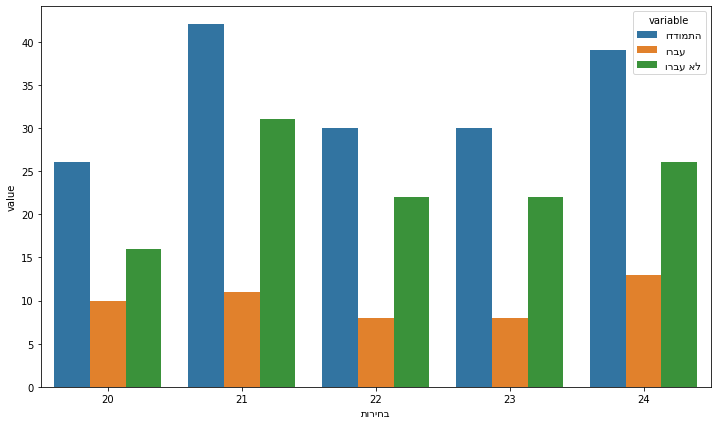

In [48]:
mitmodedim = pd.DataFrame({'בחירות': [20,21,22,23,24], 'ודדומתה' : [26,42,30,30,39] ,'ורבע אל': [16,31,22,22,26], 'ורבע':[10,11,8,8,13]}) 
mitmodedim
mitmodedim_melted = pd.melt(mitmodedim, id_vars=['בחירות'], value_vars=['ודדומתה','ורבע','ורבע אל'])
plt.figure(1, figsize=(12,7)) 
sns.barplot(x='בחירות', y = 'value' , hue= 'variable', data= mitmodedim_melted, ci = None)
plt.xlabel('תוריחב')
plt.show()

אם ניקח את את כמות המפלגות אל מול כמות העוברים ניתן להקביל זאת למודל העסקי של לוקוחות אשר אומר צמצום אופציות והקניית מבחר רחב מצד שני
לעזור ללקוח \ למצביע לבחור יותר נכון ויותר מהיר

# <a id='section2'></a>
<H1><FONT COLOR=blue>קולות פסולים - ממצאים והמלצות </FONT></H1>

<div>
<img src="https://raw.githubusercontent.com/Fitness-Squad/votes/main/%D7%AA%D7%9E%D7%95%D7%A0%D7%95%D7%AA/WhatsApp%20Image%202022-05-18%20at%2013.08.06.jpeg"/>
</div>

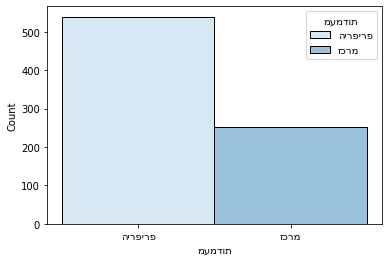

In [49]:
Votes = np.array(vote24_df['מצביעים'])
invalid = np.array(vote24_df['פסולים'])
vote24_df['אחוז לא כשרים'] = ((invalid / Votes)*100).round(3)
invalid_votes = vote24_df[['מצביעים','אחוז לא כשרים','מעמדות','שם ישוב']].sort_values('אחוז לא כשרים', ascending = False).head(793)
invalid_votes = invalid_votes.drop(labels=713, axis=0)
invalid_votes.isnull().sum()
invalid_votes = invalid_votes.dropna()
invalid_votes['מעמדות'] = invalid_votes['מעמדות'].astype(int)
invalid_votes['מעמדות'].mask(invalid_votes['מעמדות'] >=1 ,'הירפירפ', inplace=True)
invalid_votes['מעמדות'].mask(invalid_votes['מעמדות'] == 0 ,'זכרמ', inplace=True)
sns.histplot(data=invalid_votes, x='מעמדות', stat='count', hue='מעמדות', multiple = 'layer', color = 'black' , palette="Blues")
plt.show()

###### .כאן ניתן לראות כי כמות הקולות הפסולים בפריפרייה , גבוהים בהרבה מהמרכז 

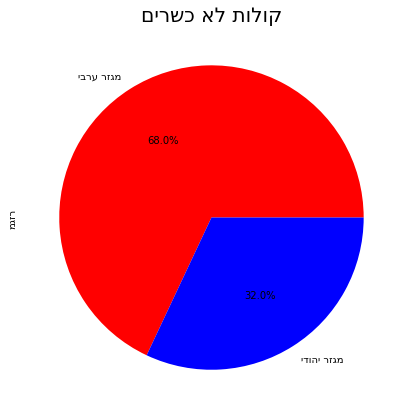

In [50]:
invalid_votes = vote24_df[['מצביעים','אחוז לא כשרים','מעמדות','שם ישוב']].sort_values('אחוז לא כשרים', ascending = False).head(25)
address = ['1', '1', '0', '1', '0' , '0' , '1' , '0' , '1' , '0' , '1' , '0' , '1' , '1' , '1' , '1' , '1' , '1' , '0' , '1' , '0', '1' , '1', '1' , '1']
invalid_votes['מגזר'] = address
invalid_votes.groupby('מגזר')
plt.figure(1, figsize=(7,7)) 
style = dict(size=20, color='black')
plt.title("םירשכ אל תולוק", **style)
invalid_votes = invalid_votes.dropna()
invalid_votes.isnull().sum()
invalid_votes['מגזר'] = invalid_votes['מגזר'].astype(int)
invalid_votes['מגזר'].mask(invalid_votes['מגזר'] == 1 ,'יברע רזגמ', inplace=True)
invalid_votes['מגזר'].mask(invalid_votes['מגזר'] == 0 ,'ידוהי רזגמ', inplace=True)
invalid_votes['מגזר'].value_counts().plot.pie(autopct="%1.1f%%", colors = ['red', 'blue'])
plt.show()

###### ההמלצה שלנו היא לבצע הסברה בטלויזיה בנוגע לאיך מכניסים מעטפה כשרה לתיבת ההצבעות במיוחד במגזר הערבית שם ראינו רוב גדול יותר , בנוסף ניתן לתלות שלטים בכניסה לקלפי שיתן דוגמאות למעטפות פסולות  

<a id='section3'></a>
<H1><FONT COLOR=blue> קמפינים </FONT></H1>

##### כמו שניתן לראות ישנה הלימה ועלייה לינארית בכמות הלא מצביעים ביחס לבעלי זכות הבחירה בישובים השונים

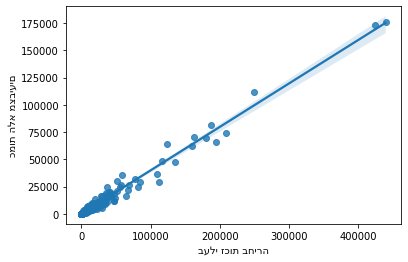

In [51]:
mount_vote24_df = vote24_df.drop(labels=713, axis=0).copy()
mount_vote24_df['אחוז המצביעים'] = (((mount_vote24_df['מצביעים']).values / (mount_vote24_df['בעלי זכות בחירה']).values)*100).round(3)
mount_vote24_df = mount_vote24_df[['שם ישוב','בעלי זכות בחירה','מצביעים','פסולים','כשרים','אחוז המצביעים']]
mount_vote24_df['כמות הלא מצביעים'] = ((mount_vote24_df['בעלי זכות בחירה'].values - mount_vote24_df['מצביעים'].values))
mount_vote24_df = mount_vote24_df.sort_values('בעלי זכות בחירה', ascending = True)
sns.regplot(data= mount_vote24_df,x='בעלי זכות בחירה', y='כמות הלא מצביעים')
plt.show()

##### לאחר צלילה בתוך הנתונים ראינו שבעצם אחוז ההצבעה אינו משקף את כמות האנשים שבוחרים להשפיע או לא להשפעה, 
##### לכן חילקנו את הדאטא לשלושה חלקים לפי גודל הישובים ע"מ להציג בברור את כמות המצביעים ביחס לבעלי זכות הבחירה  

<AxesSubplot:>

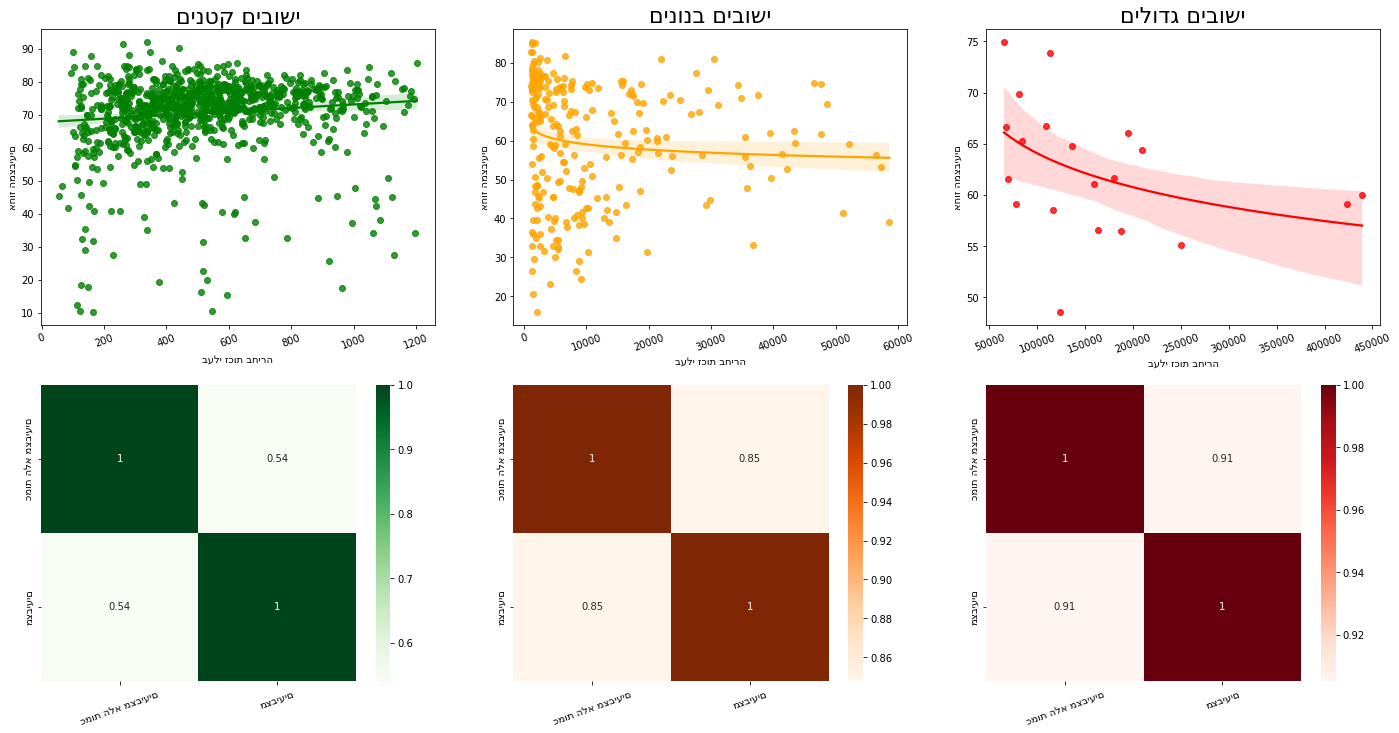

In [52]:
small_city = mount_vote24_df.iloc[0:930]
medium_city = mount_vote24_df.iloc[930:1194]
big_city = mount_vote24_df.iloc[1194:1214]
fig, axes = plt.subplots(2,3, figsize = (24,12))
sns.regplot(data=small_city,x='בעלי זכות בחירה',ax=axes[0,0], y='אחוז המצביעים',color='green')
sns.regplot(data=medium_city,x='בעלי זכות בחירה',logx=True,ax=axes[0,1],fit_reg=True, y='אחוז המצביעים',color='orange')
sns.regplot(data=big_city,x='בעלי זכות בחירה',logx=True,ax=axes[0,2],fit_reg=True, y='אחוז המצביעים',color='red')
axes[0,0].set_title("םינטק םיבושי", fontsize=22)
axes[0,1].set_title("םינונב םיבושי", fontsize=22)
axes[0,2].set_title("םילודג םיבושי", fontsize=22)

for ax in axes.flatten():
    plt.sca(ax)
    plt.xticks(rotation = 20)

corrs1= small_city[['כמות הלא מצביעים','מצביעים']].corr(method = 'kendall')
sns.heatmap(data=corrs1, cmap='Greens', annot=True,ax=axes[1,0])
corrs2 = medium_city[['כמות הלא מצביעים','מצביעים']].corr(method = 'spearman')
sns.heatmap(data=corrs2, cmap='Oranges', annot=True,ax=axes[1,1])
corrs3 = big_city[['כמות הלא מצביעים','מצביעים']].corr(method = 'spearman')
sns.heatmap(data=corrs3, cmap='Reds', annot=True,ax=axes[1,2])

##### בעלי המפלגות צריכים להעביר את מיקוד הקמפיינים לערים הגדולות על מנת למקסם את כמות המצביעים שלהם 

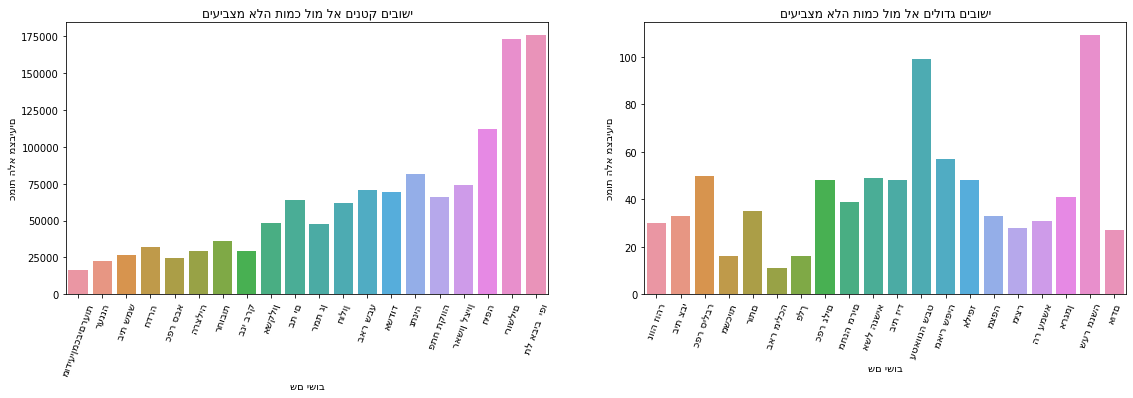

In [53]:
fig, axes = plt.subplots(1,2, figsize = (19,5))
sns.barplot(data = big_city ,x = 'שם ישוב',y='כמות הלא מצביעים',ax=axes[0])
sns.barplot(data = small_city.head(20) ,x = 'שם ישוב',y='כמות הלא מצביעים',ax=axes[1])
axes[0].set_title("םיעיבצמ אלה תומכ לומ לא םינטק םיבושי", fontsize=12)
axes[1].set_title("םיעיבצמ אלה תומכ לומ לא םילודג םיבושי", fontsize=12)
for ax in axes.flatten():
    plt.sca(ax)
    plt.xticks(rotation = 70)

<a id='section4'></a>
<H1><FONT COLOR=blue>מעמדות פוליטיים  </FONT></H1>

In [54]:
vote24_sides_df = vote24_df.drop(labels=713, axis=0).copy()
vote24_sides_df = vote24_sides_df.dropna()
vote24_sides_df.isnull().sum()
vote24_sides_df['מעמדות'] = vote24_sides_df['מעמדות'].astype(int)
vote24_sides_df['מעמדות'].mask(vote24_sides_df['מעמדות'] >=1 ,'הירפירפ', inplace=True)
vote24_sides_df['מעמדות'].mask(vote24_sides_df['מעמדות'] == 0 ,'זכרמ', inplace=True)

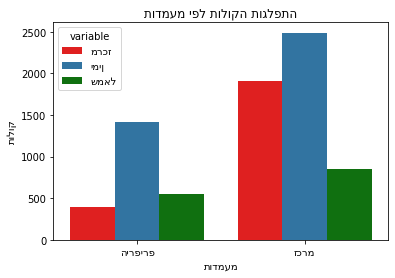

In [55]:
vote24_sides_df ["ימין"] = vote24_sides_df["שס"] +vote24_sides_df["ימינה"] + vote24_sides_df["הליכוד"] +vote24_sides_df["יהדות התורה"] +vote24_sides_df["הציונות הדתית"] +vote24_sides_df["תקווה חדשה"]
vote24_sides_df ["מרכז"] = vote24_sides_df["כחול לבן"] +vote24_sides_df["ישראל ביתנו"] + vote24_sides_df["יש עתיד"] 
vote24_sides_df["שמאל"] = vote24_sides_df["מרצ"] + vote24_sides_df["העבודה"] +vote24_sides_df["הרשימה המשותפת"] + vote24_sides_df["רעם"]
vote24_sides_df["הצבעות"] = vote24_sides_df["ימין"] + vote24_sides_df["מרכז"] + vote24_sides_df["שמאל"]
melted_df = pd.melt(vote24_sides_df, id_vars=['מעמדות', 'הצבעות'], value_vars=['מרכז','ימין', 'שמאל'])

sns.barplot(x="מעמדות", y = "value" , hue="variable", data=melted_df, ci = None, palette=["r", "C0", "g"])
plt.title("תודמעמ יפל תולוקה תוגלפתה")
plt.ylabel("תולוק")
plt.xlabel("תודמעמ")
plt.show()

##### ציפינו במרכז יהיו יותר קולות לשמאל ומצד שני בפריפריה יהיו יותר קולות לימין,
##### ובסוף הסתבר לנו שגם אמרכז וגם בפריפריה יש יותר קולות לימין,
##### אך ניתן לראות שהקולות של השמאל והמרכז עולות על הימין בערים המרכזיות

<a id='section5'></a>
<H1><FONT COLOR=blue>אחוז ההצבעה בישובים  </FONT></H1>

###### בחירה מדגמית של ישובים בחילוק ל6 אזורי עניין לבדיקת פיזור ההצבעות

In [56]:
north = vote24_df.loc[vote24_df['שם ישוב'].isin (['נהריה','נצרת','גולס','חיפה','כרמיאל','בית שאן','טבריה','יקנעם','ירכא','ריחאניה','שמרת','שפרעם','כפר ורדים','תובל','יזרעאל','טמרה','כסראסמיע','דגניה','ברעם','בית גן','חדרה','ראש פינה','מלכוש','גינוסר','קרית מוצקין','בית העמק','נוף הגליל','עברון','עמיר','עפולה','פקיעין','פרוד','משגב','כפר הנשיא','דגניה','אילנה','איילת השחר','אליקים','טובא זנגרייה','טורעאן','בית שאן','יסעור','כאבול','כפר בלום','גשר הזיו','דהרה','דבורייה','כפר חיטים','כפר חנניה'])]
center = vote24_df.loc[vote24_df['שם ישוב'].isin (['תל אביב','ראשון לציון','נתניה','טייבה','בני עיש','ירושלים','גדרה','גזר','גדרות','נס ציונה','מודיעין','רמלה','לודה','גלגוליה','אבן יהודה','אור יהודה','בנר','תל מונד','שוהם','כפר סבא','פתח תקווה','שדות ים','קלנסווה','בית יהושועה','כפר יונה','פרדס חנהכרכור' ,'אייל','אלעד','סביון','פלמחים','גני תקווה','חגור','רחובות','קריית עקרון','שפיים','כפר חבד','טירה','גבעת חיים','ניר גלים'])]
south = vote24_df.loc[vote24_df['שם ישוב'].isin (['אשדוד','תל שבע','אשקלון','אופקים','סגולה','דביר','שקף','מנוחה','כוכב מיכאל','כרמים','לכיש','מגן','באר גנים','בארי','בית גובר','קריית גת','באר טוביה','רהט','ישע','בית עזרא','יד נתן','מבקעים','בת הדר','ברכיה','גבעתי','נווה','נתיבות','זבדיאל','חולית','ורדון'])]
negev = vote24_df.loc[vote24_df['שם ישוב'].isin (['להבים','מבקיעים','אילת','מדרשת בן גוריון','תדהר','שחרות','דימונה','ירוחם','שיטים','טללים','שדה צבי','רביבים','חורה','חשב זנה','פדויים','ניר עם','בית קמה','אל סייד','אום בטין','מסלול','אבו עמרה','אבו תלול','יכיני','אשבול','לקייה','מפלסים','משאבי שדה','גבעולים','גבולות','נאות הכיכר','יטבתה','דקל','דניאל','זברגה','ניר עם','סמר','חצרים','באר שבע'])]
borders = vote24_df.loc[vote24_df['שם ישוב'].isin (['ראש הנקרה','כפר עזה','בארי','גברעם','זיקים','כיסופים','כרם שלום','נחל עוז','עין הבשור','סופה','חניתה','כפר גלעדי','יפתח','ברעם','יראון','אבן מנחם','מטולה','סאסא','שדרות','שובה','שדי אברהם','תלמים','ורד מרדכי','דורות','קריית שמונה','חורפיש','אביבים','הדס בלוט','שלומי','מגדל שמס','נווה אטיב','שתולה','זרעית','שומרה','מלכיה','אורטל','בוקעתה','מנרה','ריחניה','פסוטה','כפר בלום','מיצר','קשת','עין זיון'])]
ayosh = vote24_df.loc[vote24_df['שם ישוב'].isin (['אדורה','אורנית','אלון שבות','בית אל','ביתר עילית','גבע בנימין','אריאל','מודיעין עילית','מעלה אדומים','אלפי מנשה','אלקנה','אפרת','בית אריה','גבעת זאב','הר אדר','מעלה אפרים','עמנואל','קדומים','קריית ארבע','קרני שומרון','בקעת הירדן','גוש עציון','חברון'])]            

In [57]:
north = north.loc[:,['הליכוד','יש עתיד','ימינה','העבודה','יהדות התורה','ישראל ביתנו','הציונות הדתית','תקווה חדשה','מרצ','שס','הרשימה המשותפת','רעם','כחול לבן']].sum().copy()
center = center.loc[:,['הליכוד','יש עתיד','ימינה','העבודה','יהדות התורה','ישראל ביתנו','הציונות הדתית','תקווה חדשה','מרצ','שס','הרשימה המשותפת','רעם','כחול לבן']].sum().copy()
south = south.loc[:,['הליכוד','יש עתיד','ימינה','העבודה','יהדות התורה','ישראל ביתנו','הציונות הדתית','תקווה חדשה','מרצ','שס','הרשימה המשותפת','רעם','כחול לבן']].sum().copy()
negev = negev.loc[:,['הליכוד','יש עתיד','ימינה','העבודה','יהדות התורה','ישראל ביתנו','הציונות הדתית','תקווה חדשה','מרצ','שס','הרשימה המשותפת','רעם','כחול לבן']].sum().copy()
borders = borders.loc[:,['הליכוד','יש עתיד','ימינה','העבודה','יהדות התורה','ישראל ביתנו','הציונות הדתית','תקווה חדשה','מרצ','שס','הרשימה המשותפת','רעם','כחול לבן']].sum().copy()
ayosh = ayosh.loc[:,['הליכוד','יש עתיד','ימינה','העבודה','יהדות התורה','ישראל ביתנו','הציונות הדתית','תקווה חדשה','מרצ','שס','הרשימה המשותפת','רעם','כחול לבן']].sum().copy()
ezorim_df = pd.DataFrame({})
ezorim_df['מפלגה'] = north.keys()
ezorim_df['צפון'] = north.values
ezorim_df['אחוז צפון'] = ((north.values / ezorim_df['צפון'].sum())*100).round(3)
ezorim_df['מרכז'] = center.values
ezorim_df['אחוז מרכז'] = ((center.values / ezorim_df['מרכז'].sum())*100).round(3)
ezorim_df['דרום'] = south.values
ezorim_df['אחוז דרום'] = ((south.values / ezorim_df['דרום'].sum())*100).round(3)
ezorim_df['נגב'] = negev.values
ezorim_df['אחוז נגב'] = ((negev.values / ezorim_df['נגב'].sum())*100).round(3)
ezorim_df['גבולות'] = borders.values
ezorim_df['אחוז גבולות'] = ((borders.values / ezorim_df['גבולות'].sum())*100).round(3)
ezorim_df['איו"ש'] = ayosh.values
ezorim_df['אחוז איו"ש'] = ((ayosh.values / ezorim_df['איו"ש'].sum())*100).round(3)
ezorim_df = ezorim_df.iloc[1:12]
ezorim_df

,מפלגה,צפון,אחוז צפון,מרכז,אחוז מרכז,דרום,אחוז דרום,נגב,אחוז נגב,גבולות,אחוז גבולות,"איו""ש","אחוז איו""ש"
1,יש עתיד,56989,13.798,138024,14.518,19798,8.421,14976,10.142,2833,9.799,5824,4.899
2,ימינה,17943,4.344,61654,6.485,11565,4.919,9631,6.522,2602,9.000,11361,9.556
3,העבודה,18804,4.553,48399,5.091,4390,1.867,5899,3.995,2385,8.249,1714,1.442
4,יהדות התורה,9685,2.345,78102,8.215,17462,7.427,1250,0.847,139,0.481,34709,29.194
5,ישראל ביתנו,40064,9.700,47391,4.985,26119,11.109,12100,8.194,2022,6.994,3219,2.708
6,הציונות הדתית,10821,2.620,55700,5.859,9848,4.189,7164,4.852,1917,6.630,15793,13.284
7,תקווה חדשה,20821,5.041,49061,5.160,10041,4.271,8193,5.548,1140,3.943,4467,3.757
8,מרצ,16425,3.977,33657,3.540,2586,1.100,3213,2.176,1726,5.970,760,0.639
9,שס,19527,4.728,91219,9.595,32463,13.808,10688,7.238,2344,8.107,14854,12.494
10,הרשימה המשותפת,47344,11.463,22383,2.354,4359,1.854,1517,1.027,874,3.023,23,0.019


###### הוצאנו את מפלגת הליכוד מהמשוואה במכיוון שלא ניתן להראות יחס של שאר המפלגות בשם אחוז ההצבעה הגדול בכלל האזורים

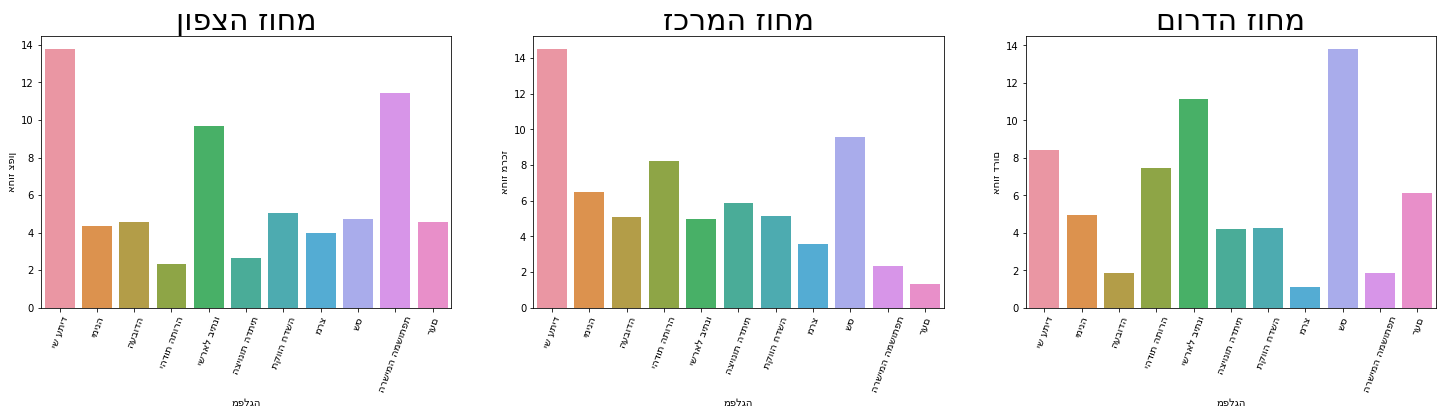

In [58]:
fig, axes = plt.subplots(1,3 ,figsize=(25,5))
sns.barplot(data = ezorim_df, x='מפלגה', y='אחוז צפון', ax = axes[0])
axes[0].set_title("ןופצה זוחמ", fontsize=30)
sns.barplot(data = ezorim_df, x='מפלגה', y='אחוז מרכז', ax = axes[1])
axes[1].set_title("זכרמה זוחמ", fontsize=30)
sns.barplot(data = ezorim_df, x='מפלגה', y='אחוז דרום', ax = axes[2])
axes[2].set_title("םורדה זוחמ", fontsize=30)

for ax in axes.flatten():
    plt.sca(ax)
    plt.xticks(rotation = 70)
    
plt.show()

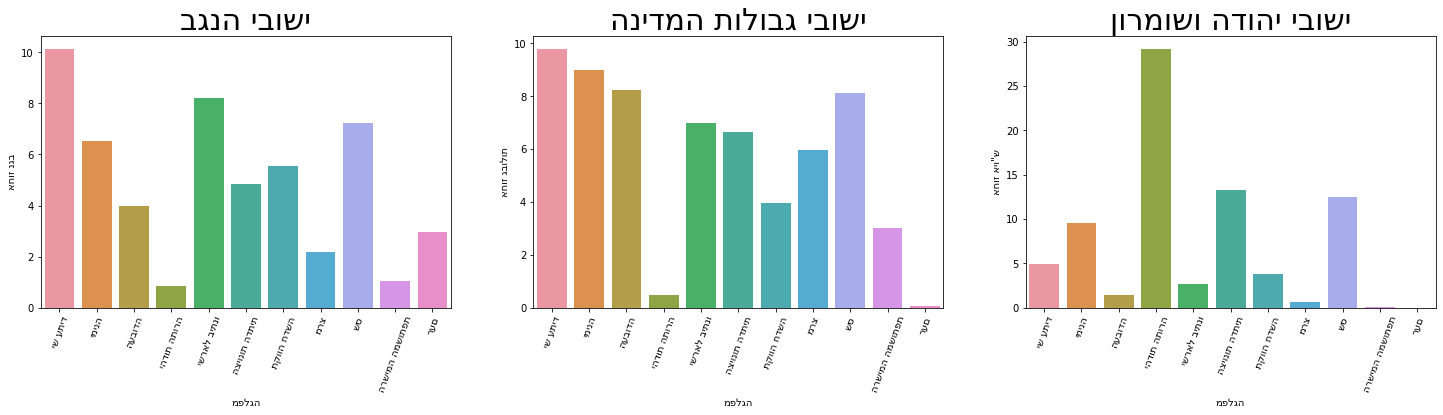

In [59]:
fig, axes = plt.subplots(1,3 ,figsize=(25,5))
sns.barplot(data = ezorim_df, x='מפלגה', y='אחוז נגב', ax = axes[0])
axes[0].set_title("בגנה יבושי", fontsize=30)
sns.barplot(data = ezorim_df, x='מפלגה', y='אחוז גבולות', ax = axes[1])
axes[1].set_title("הנידמה תולובג יבושי", fontsize=30)
sns.barplot(data = ezorim_df, x='מפלגה', y='אחוז איו"ש', ax = axes[2])
axes[2].set_title("ןורמושו הדוהי יבושי", fontsize=30)

for ax in axes.flatten():
    plt.sca(ax)
    plt.xticks(rotation = 70)

###### 1. באזור הצפון שלושה מפלגות עיקריות אשר מראות את פילוג האוכלוסיה הנמצאת באזור המתחלקת לאוכלוסיית עולים ,ערבים והדור המבוגר

###### 2. באזור המרכז ניתן לראות פילוג די זהה אך מפלגה אחת דומיננטית אשר דוגלת לפתרון שתי המדינות ולחימה בשחיתות הציבורית  

###### 3. באזור הדרום ישנם 5 מפלגות דומיננטיות אשר לכל אחד אג'נדה שונה משל השנייה דבר המראה את פילוג האוכלוסיות והדעות הפוליטיות באזור זה

###### 4. באזור הנגב ישנם ריבוי ישובים חקלאיים וכפרים בדואים ורואים כי מצביעים למפלגות בעלות אידאלים של קידום חברתי 

###### 5. באזור הגבולות ניתן לראות שיש פילוג אחיד בין המפלגות אך הצבעה נמוכה לרעם ויהדות התורה אשר פחות מדברות על בטחון  

###### 6. ניתן לראות בברור שבאזור איוש רוב האוכלוסיה מצביע למפלגות הדתיות המתעסקות בהתיישבות באיוש

<H1><FONT COLOR=blue>לסיכום </FONT></H1>

### לאחר כל מה שהצגנו לכם , אנו מאמינים כי יש לכל אחד דעה שונה ומגוונת , לכל אחד יש עתיד שהוא מדמיין לצייר למשפחתו , אנו כאן כדי להגיד לכם , לכל אחד יש קול ואתם אלו שתשפיעו על הבחירות הבאות של מדינת ישראל , אתם אלו שתקבעו מי יהיה ראש הממשלה הבא ואתם תקבעו איך הכנסת הבאה שלנו תיראה , אז אז תוותרו על הקול שלכם !

<div>
<img src="https://raw.githubusercontent.com/Fitness-Squad/votes/main/%D7%AA%D7%9E%D7%95%D7%A0%D7%95%D7%AA/WhatsApp%20Image%202022-05-19%20at%2014.43.03.jpeg"/>
</div>